## Project 2: Ames Housing Data
Laura Roman
August 2018

### Exploratory Data Analyiss

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV
from sklearn.preprocessing import StandardScaler

In [4]:
train_set = pd.read_csv('../data/train.csv')
hold_out_set = pd.read_csv('../data/test.csv')                       
houses = pd.DataFrame(train_set)

In [5]:
houses.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
hold_out_set.shape

(879, 80)

In [7]:
houses.shape

(2051, 81)

In [8]:
#houses.isnull().sum()

In [9]:
houses.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [10]:
houses['Year Built'].value_counts().head()

2005    102
2006     99
2007     78
2004     72
2003     64
Name: Year Built, dtype: int64

In [11]:
houses['Bldg Type'].value_counts() #will need to convert to numeric if we want to use this

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

In [12]:
houses.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [13]:
houses['Bldg Type'].value_counts() #will need to convert to numeric if we want to use this

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

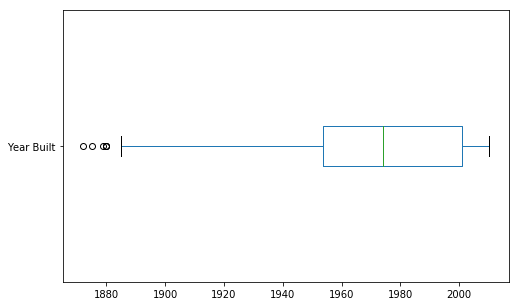

In [14]:
fig = plt.figure(figsize=(8,5))
houses['Year Built'].plot(kind="box",vert=False)

Ames Housing Data for houses in Ames, Iowa the majority of which were build 1953-2010 and sold 2006-2010.

In [15]:
houses['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

Text(0, 0.5, 'Sale Price')

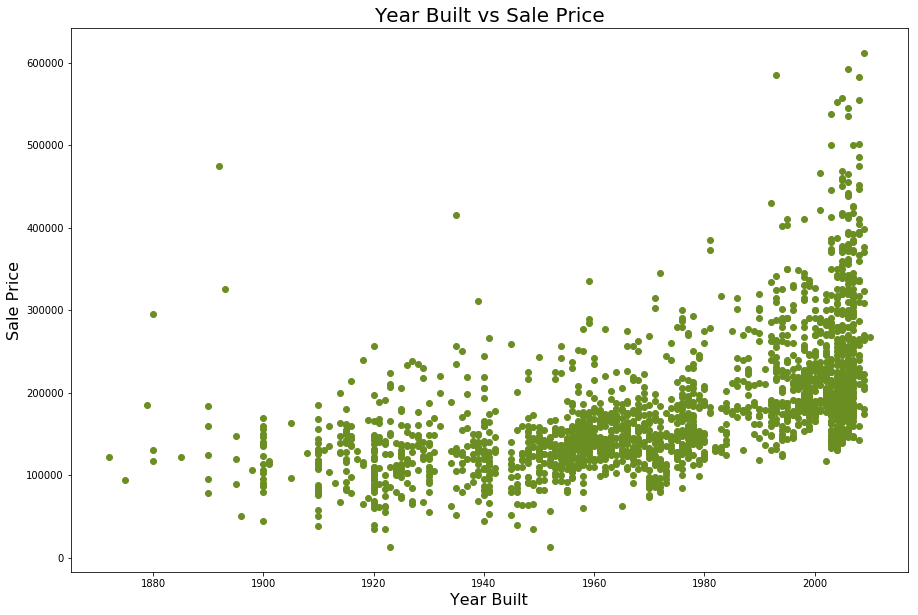

In [119]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
plt.scatter(houses['Year Built'],houses['SalePrice'],label = ("Year Built","Sale Price"),color = "olivedrab")
plt.title("Year Built vs Sale Price",fontsize =20)
plt.xlabel("Year Built", fontsize = 16)
plt.ylabel("Sale Price",fontsize=16)


## Model 1:  Year Built Only
Baseline model, no data cleaning

In [17]:
features = ['Year Built']
X = houses[features]
y = houses['SalePrice']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
scores = cross_val_score(lr,X_train,y_train).mean()
scores

0.3356952259776375

In [23]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
lr.coef_

array([1501.8935466])

In [25]:
lr.intercept_

-2779827.2048285254

In [26]:
hold_out_set.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [27]:
X_hold_out = hold_out_set[features] #so its same shape and features as train
X_hold_out.head()

,Year Built
0,1910
1,1977
2,2006
3,1923
4,1963


In [28]:
y_pred = lr.predict(X_hold_out)
y_pred[:5]

array([ 88789.46917349, 189416.33679555, 232971.24964689, 108314.08527927,
       168389.82714318])

In [29]:
my_ids = hold_out_set['Id']

In [30]:
df = pd.DataFrame()

In [31]:
df['Id']= my_ids
df['SalePrice'] = y_pred
#df

In [32]:
df.set_index(['Id'],inplace=True)

In [33]:
df.head()

,SalePrice
Id,
2658,88789.469173
2718,189416.336796
2414,232971.249647
1989,108314.085279
625,168389.827143


In [34]:
#Explort to CSV
df.to_csv('../data/Roman_predictions.csv')

In [35]:
#Kaggle Score: 76,747.23320 (lowest overall)

## Model 2:  Linear Regression
### Features "Year Built" and "Overall Quality"

In [36]:
features = ['Year Built','Overall Qual']
X = houses[features]
y = houses['SalePrice']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
#Score X_Train
score_Xtrain = cross_val_score(lr,X_train,y_train).mean()
score_Xtrain

0.6637439151743272

In [41]:
lr.coef_, lr.intercept_

(array([  380.03328709, 38988.10488038]), -806337.4621602064)

In [42]:
#Predict and score X_Test
pred_Xtest= lr.predict(X_test)
score_Xtest = cross_val_score(lr,X_test,y_test).mean()
score_Xtest

0.600007528267052

In [43]:
#Since score of X_train and X_test are similar
#Now tit the model to the entire "train_set" X,y
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
#Score on X,y
score = cross_val_score(lr,X,y).mean()
score

0.6506480167738301

In [45]:
hold_out_set.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [46]:
X_hold_out = hold_out_set[features] #so  its same shape and features as train
X_hold_out.head()

,Year Built,Overall Qual
0,1910,6
1,1977,5
2,2006,7
3,1923,5
4,1963,6


In [47]:
y_pred = lr.predict(X_hold_out)
y_pred[:5]

array([154256.3390916 , 139197.91807554, 229418.58584724, 119286.22120476,
       173799.30083515])

In [48]:
my_ids = hold_out_set['Id']
df = pd.DataFrame()
df['Id']= my_ids
df['SalePrice'] = y_pred
df.set_index(['Id'],inplace=True)

In [49]:
df.head()

,SalePrice
Id,
2658,154256.339092
2718,139197.918076
2414,229418.585847
1989,119286.221205
625,173799.300835


In [50]:
df.to_csv('../data/Roman_prediction2.csv')

In [51]:
hold_out_set['SalePrice'] = y_pred

In [52]:
hold_out_set[['Id','SalePrice']].to_csv('../data/Prediction4_udpate.csv',index=False)

In [53]:
#Kaggle score: 54957.96002

## Model 3: Ridge Regression
### Numerical Features only

In [54]:
#Filter for numeric_features exept for ID, PID (because we don't need them), and SalePrice (because its what we are trying to predict)
numeric_features=list(train_set._get_numeric_data().drop(['Id','PID','SalePrice'],axis=1).columns)

In [55]:
houses[numeric_features].columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

In [56]:
houses['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [57]:
#numeric_features
features = numeric_features

In [58]:
train_set[numeric_features].isnull().sum()

MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
dtype: int64

In [59]:
houses[numeric_features].describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,...,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,...,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719
std,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,...,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,...,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,...,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000


In [60]:
gr_yr_built_nan = train_set['Garage Yr Blt'].isnull()
train_set[gr_yr_built_nan].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,911103060,190,C (all),75.0,8250,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,86000


In [61]:
houses['Yr Sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64

In [62]:
houses['Year Built'].max(), houses['Year Built'].min()

(2010, 1872)

#### Filling Null Values:
Numeric fields with more than 2 nulls values  are:
<br>
Lor Frontage (330) - Linear feet of street connected to property
Mas Vnr Area (22) -  Masonry veneer type
Garage Yr Blt (114) - Year garage was built
To fix these, we fill NaN wil 0 for all numerical columns in both train and test sets.


In [63]:
#Fill na's in numeric columns with zeros
for feature in numeric_features:
    train_set[feature] = train_set[feature].fillna(0)
    hold_out_set[feature] = hold_out_set[feature].fillna(0)

In [64]:
#create test, train set to test model of only numeric features

In [65]:
X = train_set[numeric_features]
y = train_set['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [66]:
#Created hold_out as well
X_hold_out_set = hold_out_set[numeric_features]
#X_hold_out_set.head()

In [67]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train) 
X_test_scaled = ss.transform(X_test)

#scale hold out for kaggle prediction
X_hold_out_scaled = ss.transform(X_hold_out_set)
#Fit ridge to X,y scaled
X_scaled = ss.transform(X)

In [68]:
ridge = RidgeCV()
ridge.fit(X_train_scaled,y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [69]:
score = cross_val_score(ridge,X_train_scaled,y_train).mean()
score

0.8214793423887286

In [70]:
ridge.score(X_test_scaled,y_test)

0.7927346896801628

In [71]:
ridge.coef_

array([-6.50995010e+03,  8.02056639e+02,  2.56600143e+03,  2.24868050e+04,
        4.61055227e+03,  1.09481447e+04,  4.53635158e+03,  5.64372736e+03,
        3.96837408e+03,  3.24274593e+02, -6.72543773e+02,  3.55004038e+03,
        9.99695235e+03,  7.35970667e+03, -6.75568476e+02,  1.40743576e+04,
        4.36457763e+03, -2.62868823e+02,  1.33628287e+03, -8.75667225e+02,
       -7.57936157e+03, -3.85417446e+03,  7.31684053e+03,  3.06495035e+03,
       -5.59462679e+03,  8.36636304e+03,  2.06554427e+03,  4.00566665e+03,
        6.05156946e+02,  1.08065387e+03,  7.83585452e+02,  2.99082240e+03,
       -3.92199636e+03, -1.54616474e+00,  1.31708925e+03, -1.10828642e+03])

In [72]:
#Sorter ridge coefs by abs value
temp_df = pd.DataFrame({'features':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

temp_df.sort_values('abs_coef', inplace=True, ascending=False)
temp_df

,features,coef,abs_coef
3,Overall Qual,22486.804984,22486.804984
15,Gr Liv Area,14074.357629,14074.357629
5,Year Built,10948.144679,10948.144679
12,1st Flr SF,9996.952347,9996.952347
25,Garage Cars,8366.363037,8366.363037
20,Bedroom AbvGr,-7579.361566,7579.361566
13,2nd Flr SF,7359.706675,7359.706675
22,TotRms AbvGrd,7316.840528,7316.840528
0,MS SubClass,-6509.950102,6509.950102
7,Mas Vnr Area,5643.727356,5643.727356


In [73]:
temp_df.to_csv('../data/Ridge_coefs.csv')

In [74]:
#Fit to entire training set 
ridge.fit(X_scaled,y)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [75]:
#Score on whole training set
score_ws = cross_val_score(ridge,X_scaled,y).mean()
score_ws

0.8054153900511487

In [76]:
preds = ridge.predict(X_hold_out_scaled)

In [77]:
my_ids = hold_out_set['Id']
df = pd.DataFrame()
df['Id'] = my_ids
df['SalePrice'] = preds
df.set_index(['Id'],inplace=True)
df.head()
   

,SalePrice
Id,
2658,126427.593890
2718,149299.429834
2414,215282.447518
1989,117866.305355
625,197010.220922


In [78]:
df.to_csv('../data/Prediction7_updates.csv')
# All Numeric columns scaled, ridge model , fit on entire traiing set. 
#second best Kaggle Score: 41591.42524


## Model 4: Ridge Top 15 Numerical Feautres


In [79]:
temp_df.features[0:15]

3       Overall Qual
15       Gr Liv Area
5         Year Built
12        1st Flr SF
25       Garage Cars
20     Bedroom AbvGr
13        2nd Flr SF
22     TotRms AbvGrd
0        MS SubClass
7       Mas Vnr Area
24     Garage Yr Blt
4       Overall Cond
6     Year Remod/Add
16    Bsmt Full Bath
27      Wood Deck SF
Name: features, dtype: object

In [80]:
top_15 = ['Overall Qual',
        'Gr Liv Area',
        'Year Built',
        '1st Flr SF',
        'TotRms AbvGrd',
        'Garage Cars',
        'Misc Val',
        'MS SubClass',
        '2nd Flr SF',
        'Garage Yr Blt',
        'Mas Vnr Area',
        'Bedroom AbvGr',
        'Year Remod/Add',
        'Pool Area',
        'BsmtFin SF 1']

In [81]:
numeric_features = top_15

In [82]:
#Set features to numeric features
X = train_set[numeric_features]
y = train_set['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y)

#Created hold_out as well
X_hold_out_set = hold_out_set[numeric_features]

In [83]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train) 
X_test_scaled = ss.transform(X_test)

#scale hold out for kaggle prediction
X_hold_out_scaled = ss.transform(X_hold_out_set)
#Fit ridge to X,y scaled
X_scaled = ss.transform(X)

ridge = RidgeCV()
ridge.fit(X_train_scaled,y_train)

score = cross_val_score(ridge,X_train_scaled,y_train).mean()
score

0.8082898311990165

In [84]:
temp_df = pd.DataFrame({'features':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

temp_df.sort_values('abs_coef', inplace=True, ascending=False)
temp_df

,features,coef,abs_coef
0,Overall Qual,26381.571391,26381.571391
3,1st Flr SF,16931.499287,16931.499287
1,Gr Liv Area,12368.079904,12368.079904
8,2nd Flr SF,11816.927724,11816.927724
5,Garage Cars,10382.347903,10382.347903
7,MS SubClass,-8994.042860,8994.042860
14,BsmtFin SF 1,8830.206479,8830.206479
10,Mas Vnr Area,7274.494551,7274.494551
2,Year Built,7261.327644,7261.327644
11,Bedroom AbvGr,-6372.684030,6372.684030


In [85]:
ridge.score(X_test_scaled,y_test)

0.7575099962482961

In [86]:
#Fit to entire training set 
ridge.fit(X_scaled,y)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [87]:
#Score on whole training set
score_top15 = cross_val_score(ridge,X_scaled,y).mean()
score_top15

0.7992714677250173

In [88]:
preds = ridge.predict(X_hold_out_scaled)

In [89]:
hold_out_set['SalePrice'] = preds

In [90]:
hold_out_set[['Id','SalePrice']].to_csv('../data/Prediction8_Top15.csv',index=False)

In [91]:
#Did not improve the Kaggle score: 42313.79367

### Model 5: Ridge Regression, Categorical features (all dummied) and Numeric Features

In [92]:
numeric_features=list(train_set._get_numeric_data().drop(['Id','PID','SalePrice'],axis=1).columns)

In [93]:
#numeric_features
features = numeric_features# can add caterogicals ot this later

In [94]:
#Fill na's in numeric columns with zeros
for feature in numeric_features:
    train_set[feature] = train_set[feature].fillna(0)
    hold_out_set[feature] = hold_out_set[feature].fillna(0)

In [95]:
cat_columns = train_set.select_dtypes(include=['object']).columns

In [96]:
for col in cat_columns: 
    #Fill N/As
    train_set[col] = train_set[col].fillna('N/A')
    hold_out_set[col] = hold_out_set[col].fillna('N/A')

    train_values = sorted(train_set[col].unique())
    hold_out_values = sorted(hold_out_set[col].unique())

    #create a set of (unique) values in both datasets
    categories = set(train_values + hold_out_values)

    train_set[col] = pd.Categorical(train_set[col],categories= categories)
    hold_out_set[col] = pd.Categorical(hold_out_set[col],categories = categories)

In [97]:
#makes all categorical columns into dummies
train_set_dummies = pd.get_dummies(train_set[cat_columns])
hold_out_set_dummies = pd.get_dummies(hold_out_set[cat_columns])

In [98]:
#put the numeric and catogrical columns 

X_train_set = pd.concat([train_set_dummies, train_set[numeric_features]],axis =1)
X_hold_out = pd.concat([hold_out_set_dummies,hold_out_set[numeric_features]],axis =1)
y = train_set['SalePrice']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_train_set,y)

In [100]:
ridge = RidgeCV()

In [101]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train) 
X_test_scaled = ss.transform(X_test)

#save for later.
X_train_set_scaled = ss.fit_transform(X_train_set) 
X_hold_out_scaled = ss.transform(X_hold_out)

In [102]:
ridge.fit(X_train_scaled,y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [103]:
ridge_score = cross_val_score(ridge,X_train_scaled,y_train).mean()
ridge_score

0.8146948800300163

In [104]:
pred_test = ridge.predict(X_test_scaled)

In [105]:
cross_val_score(ridge,X_test_scaled, y_test).mean()

0.8594293799317336

In [106]:
ridge.fit(X_train_set_scaled,y)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [107]:
cross_val_score(ridge,X_train_set_scaled,y).mean()

0.8501894224388505

In [108]:
preds_cn = ridge.predict(X_hold_out_scaled)

In [109]:
hold_out_set['SalePrice'] = preds_cn

In [110]:
hold_out_set[['Id','SalePrice']].to_csv('../data/Prediction5_update.csv',index=False)

In [111]:
#Best prediction so far: Kaggle score = 38,111.75614

Steps to get condensed code above for categorical feature list:

In [112]:
cat_columns = train_set.select_dtypes(include=['object']).columns

In [113]:
col = cat_columns
col

Index([], dtype='object')

In [114]:
# check for mismatch
#get unique values in column 0
sorted(train_set[col].unique())

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
#get unique values in column 0
sorted(hold_out_set[col].unique())
#there's a mismatch here (if we were ot create dummies)

In [ ]:
train_values = sorted(train_set[col].unique())
hold_out_values = sorted(hold_out_set[col].unique())

In [ ]:
#create a set of (unique) values that will appear in both datasets
categories = set(train_values + hold_out_values)
categories

In [ ]:
pd.Categorical(train_set[col],categories= categories)

In [ ]:
pd.Categorical(hold_out_set[col]) #diff than train_set


In [ ]:
pd.Categorical(hold_out_set[col],categories = categories) # can set categories here

In [ ]:
train_set[col] = pd.Categorical(train_set[col],categories= categories)
hold_out_set[col] = pd.Categorical(hold_out_set[col],categories = categories)